# FastAI-Website-Legitimation

## Introduction¶

This project part is about to demonstrate how to use FastAI to detect NSFW (Not Safe for Work) images on a website.

Flow:
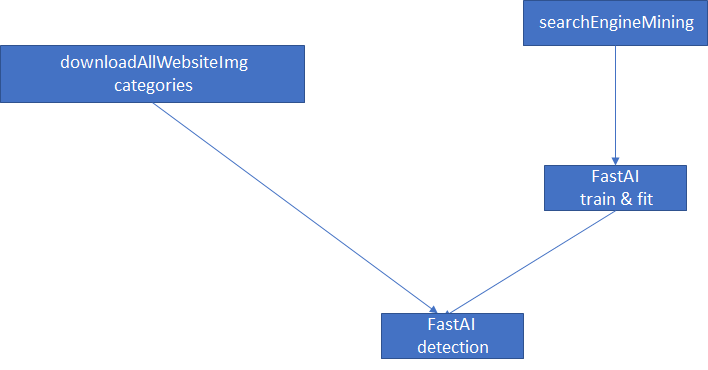

## Part#1 - searchEngineMining & test websites images download

The SE (search engine downloader) is needed for training FastAI to distinct between 'Good' to 'Bad' (NSFW) images.
Since, we need to download amount of non pleasant images, we'll use this specific tool.

In [ ]:
#Step:1 - All search engine related func
import cv2
def getData(searchUrl, folder):
    print("Get main url")
    global data
    global justFile
    # Open the URL as Browser, not as python urllib
    page = urllib.request.Request(searchUrl, headers={
        'User-Agent': '"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.69 Safari/537.36"'})
    soup = urllib.request.urlopen(page).read()
    data = BeautifulSoup(soup, "html.parser")
    justFile = folder + '/search_page.txt'
    file2write = open(justFile, 'w', encoding='utf-8')
    file2write.write(str(data))
    file2write.close()
    return

#read line by line
def imgMethod2(justFile):
    global urls
    urls = []
    with open(justFile, encoding="mbcs", errors='ignore') as f:
        line = f.readline()
        cnt = 1
        while line:
            if line.find('"http') != -1:
                line = line[line.find('"http') + 1:]
                line = line.split('"')[0]
                if line.find(".jpg") != -1 or line.find(".jpeg") != -1:
                    urls.append(line)

            line = f.readline()
            cnt += 1

    urls = list(set(urls))
    if len(urls) > 500:
        urls = urls[0:500]
    return

#Download img
def imgDownloader(urls):
    for k, valueC in enumerate(urls):
        if valueC.find(".jpg") != -1:
            imgExt = ".jpg"
        elif valueC.find(".jpeg") != -1:
            imgExt = ".jpeg"
        imgFile = folder + '/' + str(k) + imgExt
        try:
            img = requests.get(valueC).content
            with open(imgFile, 'wb') as f:
                f.write(img)
                f.close()
        except:
            continue
    return


def imgValidnResize(folder):
    #Check image valid: read, size
    imgList = os.listdir(folder)
    # validate if file is too small 2KB
    for i, value in enumerate(imgList):
        imgFullPath = folder + '/' + value
        file_size = os.stat(imgFullPath).st_size
        if file_size < 4000 or file_size > 16000000000:
            os.remove(imgFullPath)
        else:
            try:
                img = cv2.imread(imgFullPath, cv2.IMREAD_UNCHANGED)
                img.shape
            except:
                os.remove(imgFullPath)

    #resize
    imgList = os.listdir(folder)
    # validate if file is too small 2KB
    for i, value in enumerate(imgList):
        imgFullPath = folder + '/' + value
        # Crop & Resize
        img = cv2.imread(imgFullPath, cv2.IMREAD_UNCHANGED)
        # dsize
        dsize = (224, 224)
        # resize image
        output = cv2.resize(img, dsize)
        cv2.imwrite(imgFullPath, output)
    return

In [ ]:
#Step:2 - run SE downloaed
#List keywords
searchUrl = 'https://www.google.com/search?tbm=isch&sxsrf=ALeKk01WaEv6oHDoZ_QusigxEC439dDEMQ%3A1591724524753&source=hp&biw=1680&bih=907&ei=7MnfXtXLK4-ZkgWAy5B4&q=cannabis&oq=cannabis&gs_lcp=CgNpbWcQAzICCAA6BwgjEOoCECc6BQgAELEDUJ4cWK0sYNg5aAFwAHgAgAGlAYgBhgmSAQMwLjiYAQCgAQGqAQtnd3Mtd2l6LWltZ7ABCg&sclient=img&ved=0ahUKEwjV8YD3o_XpAhWPjKQKHYAlBA8Q4dUDCAc&uact=5'
ligalList = ['tech']
for x, valueX in enumerate(ligalList):
    searchUrl = 'https://www.google.com/search?tbm=isch&sxsrf=ALeKk01WaEv6oHDoZ_QusigxEC439dDEMQ%3A1591724524753&source=hp&biw=1680&bih=907&ei=7MnfXtXLK4-ZkgWAy5B4&q=cannabis&oq=cannabis&gs_lcp=CgNpbWcQAzICCAA6BwgjEOoCECc6BQgAELEDUJ4cWK0sYNg5aAFwAHgAgAGlAYgBhgmSAQMwLjiYAQCgAQGqAQtnd3Mtd2l6LWltZ7ABCg&sclient=img&ved=0ahUKEwjV8YD3o_XpAhWPjKQKHYAlBA8Q4dUDCAc&uact=5'
    searchUrl = searchUrl.replace('cannabis', valueX)
    folder = 'G:/DataScienceProject/webcrawler/searchEngineImages/' + valueX
    if os.path.exists(folder) == False:
        os.mkdir(folder)
    getData(searchUrl, folder)
    imgMethod2(justFile)
    imgDownloader(urls)
    imgValidnResize(folder)


## Step:3 - Arrange the train folder
## Was to easy, i done it manually, as followed:
G:/DataScienceProject/webcrawler/train/nsfw/alcohol
G:/DataScienceProject/webcrawler/train/nsfw/cannabis
G:/DataScienceProject/webcrawler/train/nsfw/gambling
G:/DataScienceProject/webcrawler/train/nsfw/nude
G:/DataScienceProject/webcrawler/train/nsfw/porn
G:/DataScienceProject/webcrawler/train/nsfw/tobacco_smoking
G:/DataScienceProject/webcrawler/train/nsfw/violence
G:/DataScienceProject/webcrawler/train/regular/animal
G:/DataScienceProject/webcrawler/train/regular/beach
G:/DataScienceProject/webcrawler/train/regular/business
G:/DataScienceProject/webcrawler/train/regular/car
G:/DataScienceProject/webcrawler/train/regular/cellular
G:/DataScienceProject/webcrawler/train/regular/coffee
G:/DataScienceProject/webcrawler/train/regular/hotel
G:/DataScienceProject/webcrawler/train/regular/tech
G:/DataScienceProject/webcrawler/train/regular/telecom
G:/DataScienceProject/webcrawler/train/regular/vacation

## Note: before move image folder into train folder, make sure that each image has a unique name.

In [ ]:
#Step:4 -  Train/CV Splitter
import random
import shutil
import os
folder = 'G:/DataScienceProject/webcrawler/train/'
folderList = os.listdir(folder)
for i, valueA in enumerate(folderList):
    subfolder1 = folder + valueA + '/'
    subFolderList = os.listdir(subfolder1)
    for j, valueB in enumerate(subFolderList):
        subfolder2 = subfolder1 + valueB
        print(subfolder2)

        catSubFolderList = os.listdir(subfolder2)
        sampleSize = int(len(catSubFolderList) / 10)
        sampled_list = random.sample(catSubFolderList, sampleSize)
        for k, valueC in enumerate(sampled_list):
            imgSrcPath = subfolder2 + '/' + valueC
            imgDstPath = imgSrcPath.replace("train", "cv")
            shutil.copy(imgSrcPath, imgDstPath)
            os.remove(imgSrcPath)

In [ ]:
#Step:5 - Download test webstie images
import requests
from bs4 import BeautifulSoup
import os
import cv2
'''
testList = ['https://www.hbo.com/']
'''
path = 'G:/DataScienceProject/webcrawler/test/'
for i, valueA in enumerate(testList):
    #Website name
    websiteName = valueA.split(".")[1]
    print(websiteName)
    #Prefix
    prefix = valueA.split(".")[0].split(":")[0]
    filename = path + websiteName + '/full_website.txt'

    try:
        #Load the full website html
        with open(filename, 'r', errors='ignore') as f:
            data = f.read()
            f.close()
        #Extract only image urls
        data = BeautifulSoup(data, "html.parser")
        img_tags = data.find_all('img')
        urls = [img['src'] for img in img_tags]
        urls[0] #If list emtpy create error to force exception
    except:
        #Read line by line - for handling Dell website type
        urls = []
        with open(filename, encoding="mbcs", errors='ignore') as f:
            line = f.readline()
            cnt = 1
            while line:
                if line.find('img src') != -1:
                    line = line[line.find('img src')+9:]
                elif line.find('img alt') != -1:
                    line = line[line.find('src') + 5:]
                elif line.find('meta content') != -1:
                    line = line[line.find('meta content') + 14:]
                line = line.split('"')[0]
                if line[0:2] == '/*' or line == '':
                    {}
                elif line[0] == '/' or line[0:4] == 'http':
                    urls.append(line)
                #print("Line {}: {}".format(cnt, line.strip()))
                line = f.readline()
                cnt += 1

    urls = list(set(urls))
    #Remove error image links - Cisco type
    for n, valueE in enumerate(urls):
        if valueE[0:2] == '//':
            del urls[n]

    #Handle relative urls
    for j, valueB in enumerate(urls):  ##to add website name
        if valueB == '':
            del urls[j]
        elif valueB[0] == '/':
            urls[j] = valueA + valueB

    #Create image folder
    imgPath = path + websiteName + '/img/'
    if os.path.exists(imgPath) == False:
        os.mkdir(imgPath)

    #Download all website images   #### Need to handle web img extension!!
    for k, valueC in enumerate(urls):
        imgExt = urls[k].split(".")[-1]
        if imgExt != 'svg':
            if len(imgExt) > 4 and imgExt[-4] == '=':
                imgExt = imgExt.split("=")[-1]
            imgFile = imgPath + str(k) + '.' + imgExt
        try:
            img = requests.get(valueC).content
            with open(imgFile, 'wb') as f:
                f.write(img)
                f.close()
        except:
            continue

    imgList = os.listdir(imgPath)
    # validate if file is too small 2KB
    for i, value in enumerate(imgList):
        imgFullPath = imgPath + value
        file_size = os.stat(imgFullPath).st_size
        if file_size < 4000 or file_size > 16000000000:
            os.remove(imgFullPath)
        else:
            try:
                img = cv2.imread(imgFullPath, cv2.IMREAD_UNCHANGED)
                img.shape
            except:
                os.remove(imgFullPath)

    imgList = os.listdir(imgPath)
    # validate if file is too small 2KB
    for i, value in enumerate(imgList):
        imgFullPath = imgPath + value
        # Crop & Resize
        img = cv2.imread(imgFullPath, cv2.IMREAD_UNCHANGED)
        xWD = int(img.shape[1] / 224)
        xHI = int(img.shape[0] / 224)
        if xWD > 2 and xHI >2:
            #crop = img[100:300, 100:300] #y: y+h, x: x+w
            for x in range(xWD):
                for y in range(xHI):
                    ystart = y * 224
                    yend = ystart + 224
                    xstart = x * 224
                    xend = xstart + 224
                    crop = img[ystart:yend, xstart:xend]
                    cropName = imgFullPath.split(".")[0] + str(y) + str(x) + str('.')+ imgFullPath.split(".")[1]
                    cv2.imwrite(cropName, crop)

            os.remove(imgFullPath)



# Part#2 - FastAI

In [1]:
#Step:6 - FastAI
from fastai.vision import *
import warnings
warnings.filterwarnings('ignore')
path = 'G:/DataScienceProject/webcrawler/train'
folderList = os.listdir(path)
data = ImageDataBunch.from_folder(path,
                                  train=".",
                                  test="../cv",
                                  valid_pct=0.1,
                                  classes=folderList)

In [2]:
#Step:7 - Check accuricy over iteration 
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet34, metrics=accuracy)
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(30)

epoch,train_loss,valid_loss,accuracy,time
0,4.019870,2.513050,0.224299,00:24
1,3.214707,1.195631,0.616822,00:15
2,2.438077,0.699407,0.794393,00:14
3,1.832302,0.534569,0.841121,00:14
4,1.389410,0.470504,0.841121,00:14
5,1.068376,0.472817,0.859813,00:15
6,0.822551,0.467992,0.850467,00:14
7,0.642952,0.423794,0.859813,00:14
8,0.516821,0.455216,0.831776,00:15
9,0.416723,0.428948,0.869159,00:15


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


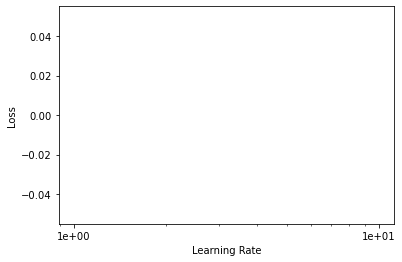

In [3]:
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot()

In [4]:
learn.fit_one_cycle(30, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.032195,0.523867,0.850467,00:16
1,0.023974,0.515463,0.850467,00:16
2,0.028097,0.522798,0.859813,00:16
3,0.029878,0.504512,0.859813,00:16
4,0.029407,0.595161,0.850467,00:16
5,0.036940,0.733822,0.813084,00:16
6,0.044722,0.629720,0.841121,00:16
7,0.045579,0.645625,0.822430,00:16
8,0.052527,0.598010,0.859813,00:16
9,0.061957,0.556766,0.869159,00:16


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


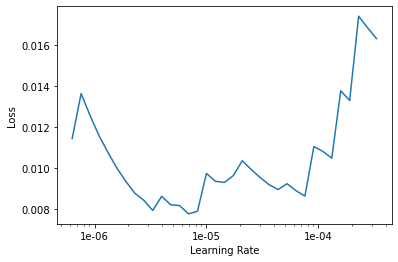

In [5]:
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot()

In [6]:
#Step:8 - Cleansing images
from fastai.widgets import *


ds, idxs = DatasetFormatter().from_toplosses(learn)
ImageCleaner(ds, idxs, path)
if os.path.exists('G:/DataScienceProject/webcrawler/train/models/tmp.pth'):
    os.remove('G:/DataScienceProject/webcrawler/train/models/tmp.pth')
    os.rmdir('G:/DataScienceProject/webcrawler/train/models')
else:
    {}

if os.path.exists('G:/DataScienceProject/webcrawler/train/cleaned.csv'):
    df = pd.read_csv('G:/DataScienceProject/webcrawler/train/cleaned.csv', header='infer')
    df['class'] = df.name.str.rsplit("\\", expand=True)[0]


if (df['class'].all() != df['label'].all()) == True:
    os.remove('G:/DataScienceProject/webcrawler/train/cleaned.csv')
else:
    {}

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [7]:
#Step:9 - FastAI re-run after cleansing images
from fastai.vision import *
import warnings
warnings.filterwarnings('ignore')
path = 'G:/DataScienceProject/webcrawler/train'
folderList = os.listdir(path)
data = ImageDataBunch.from_folder(path,
                                  train=".",
                                  test="../cv",
                                  valid_pct=0.1,
                                  classes=folderList)

epoch,train_loss,valid_loss,accuracy,time
0,4.388728,3.792895,0.719626,00:15
1,3.409734,1.285964,0.719626,00:17
2,2.127457,0.066224,0.971963,00:16
3,1.360148,0.036858,0.990654,00:15
4,0.918974,0.045735,0.990654,00:15
5,0.644385,0.056198,0.990654,00:15
6,0.463193,0.048133,0.990654,00:16
7,0.337698,0.049918,0.990654,00:15
8,0.251245,0.072447,0.990654,00:15
9,0.189782,0.078490,0.981308,00:15


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,0.011374,0.074097,0.990654,00:17
1,0.011084,0.071579,0.990654,00:17
2,0.016282,0.073622,0.990654,00:17
3,0.014621,0.079858,0.990654,00:17
4,0.017397,0.072116,0.981308,00:16
5,0.018927,0.088501,0.990654,00:16
6,0.020343,0.070200,0.981308,00:16
7,0.035146,0.286476,0.971963,00:16
8,0.052318,0.409916,0.953271,00:16
9,0.060069,0.227677,0.981308,00:16


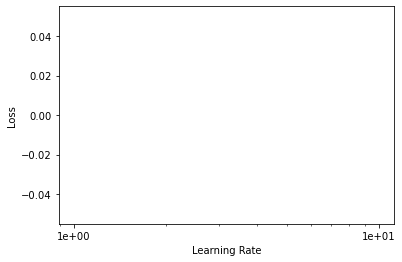

In [8]:
#Step:11 
learn.data = data
learn.freeze()
learn.fit_one_cycle(30)
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(30, max_lr=slice(3e-5, 3e-4))
#learn.save('G:/DataScienceProject/webcrawler/fastai')
learn.export('G:/DataScienceProject/webcrawler/fastai.pkl')

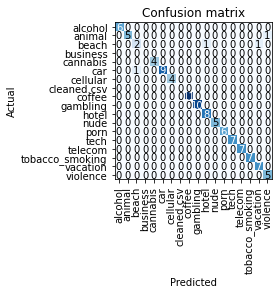

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [14]:
import fastai

learn = load_learner('G:/DataScienceProject/webcrawler/', 'fastai.pkl')

nsfwList = ['alcohol', 'cannabis', 'gambling', 'nude', 'porn', 'tobacco_smoking', 'violence']
testFolders = os.listdir('G:/DataScienceProject/webcrawler/test/')

for i, valueA in enumerate(testFolders):
    imgPath = 'G:/DataScienceProject/webcrawler/test/' + valueA + '/img/'
    imgTestList = os.listdir(imgPath)
    if len(imgTestList) != 0:
        nswfCounter = 0
        for j, valueB in enumerate(imgTestList):
            file = imgPath + valueB
            img = open_image(file)
            pred_class, pred_idx, output = learn.predict(img)

            for k, valueC in enumerate(nsfwList):
                if valueC == str(pred_class):
                    nswfCounter += 1

        msg = "NSFW images: " + str(int( (nswfCounter / len(imgTestList)) *100)) + "%"
        #print(msg)
        reportFile = 'G:/DataScienceProject/webcrawler/test/' + valueA + '/' + valueA + '.txt'
        with open(reportFile, 'a+') as f:
            f.write(f"{msg}\n")
            f.close()